In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df =pd.read_csv('/Users/nikhilraizada/Downloads/TensorFlow_FILES/DATA/cancer_classification.csv')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
#quick info call to check if any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
#For classification tasks. It's always a good idea to do a count plot of your actual label to see the number 
#of instances per label and see if it's a well balanced problem or not.

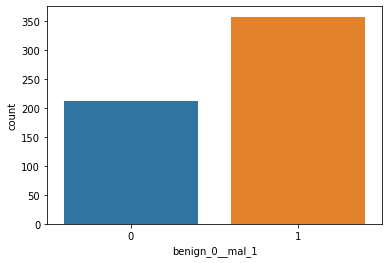

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

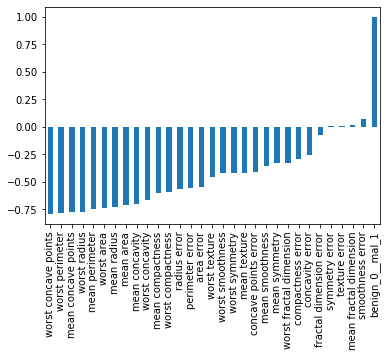

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

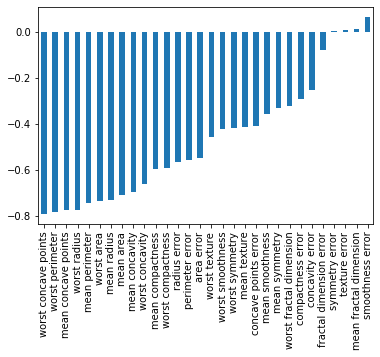

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

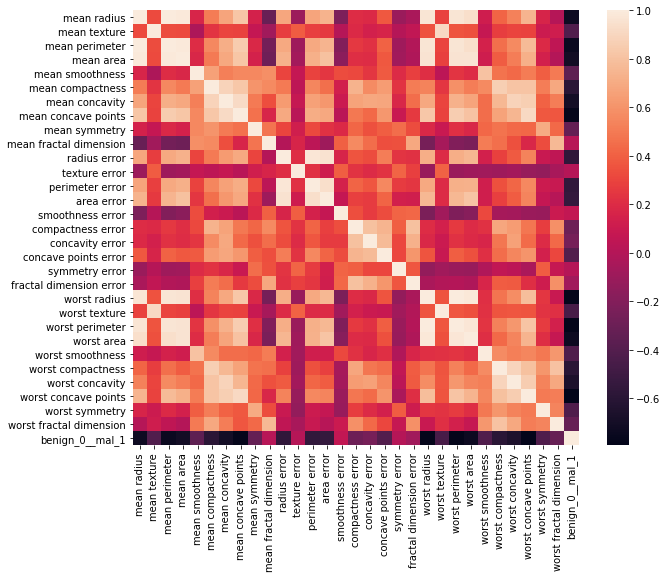

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [18]:
X = df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [26]:
#scaling the data now

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,Dropout

In [34]:
X_train.shape

(426, 30)

In [36]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#However the activation and this critical will be sigmoid because this is a binary classification problem.
#So for a binary classification problem we want the last activation to be sigmoid.
#Specific activation to have binary classification
#one neuron outputting something between a 0 and 1 and that will decide what class this belongs to either
#malignant or benign.

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

#The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work 
#through the entire training dataset. One epoch means that each sample in the training dataset has had an 
#opportunity to update the internal model parameters. An epoch is comprised of one or more batches



In [37]:
#intentionally taking the value of epochs higher
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6871 - val_loss: 0.6650
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6382 - val_loss: 0.6197
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5935 - val_loss: 0.5738
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5482 - val_loss: 0.5236
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4955 - val_loss: 0.4670
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4441 - val_loss: 0.4155
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3980 - val_loss: 0.3689
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.3328
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3328 - val_loss: 0.3094
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3060 - val_loss: 0.2785
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1132
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.1262
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.1225
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1166
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1157
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.1141
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.1171
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1308
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0490 - val_loss: 0.1126
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0493 - val_loss: 0.1205
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1347
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1310
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.1287
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.1396
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1374
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0314 - val_loss: 0.1265
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1440
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.1267
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1419
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1285
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.1594
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.1474
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.1662
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.1481
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1524
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1509
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1536
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1587
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1583
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1480
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.1618
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.1867
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.1811
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.1769
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.1576
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2148
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.1823
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.1636
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.1940
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.1700
Epoc

In [38]:
model.history.history

{'loss': [0.6871285438537598,
  0.6381807327270508,
  0.5935070514678955,
  0.5481707453727722,
  0.4955129027366638,
  0.4440716803073883,
  0.397980272769928,
  0.3588331341743469,
  0.33282217383384705,
  0.306025892496109,
  0.285257488489151,
  0.2648625075817108,
  0.24673578143119812,
  0.23209941387176514,
  0.21903620660305023,
  0.20640279352664948,
  0.19530445337295532,
  0.185642272233963,
  0.17570802569389343,
  0.16658133268356323,
  0.1595214456319809,
  0.1503891497850418,
  0.14333496987819672,
  0.13636702299118042,
  0.13128536939620972,
  0.12354516983032227,
  0.11800109595060349,
  0.11477392166852951,
  0.10919801890850067,
  0.10580896586179733,
  0.10255006700754166,
  0.09721221029758453,
  0.09378127753734589,
  0.0911027267575264,
  0.08864284306764603,
  0.08560680598020554,
  0.08287189155817032,
  0.08255356550216675,
  0.07907814532518387,
  0.0781511440873146,
  0.0752074271440506,
  0.07366552203893661,
  0.07197950780391693,
  0.07166081666946411,
 

In [43]:
losses=pd.DataFrame(model.history.history)

In [44]:
losses

,loss,val_loss
0,0.687129,0.665016
1,0.638181,0.619689
2,0.593507,0.573779
3,0.548171,0.523607
4,0.495513,0.466981
...,...,...
595,0.003158,0.194749
596,0.003272,0.188276
597,0.003285,0.183646
598,0.003150,0.198154


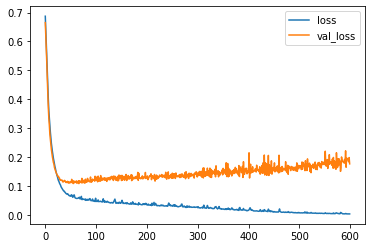

In [45]:
losses.plot()

In [46]:
#this is a perfect example of over fitting. The key characteristic here over fitting.
#You'll notice in the beginning during the first couple of epochs both validation and training loss are
#both decreasing.

#However our validation loss is beginning to increase.
#That basically tells us that we're over fitting to our training dataset so we have a clear indication
#here that we're training just for too many epochs.

In [47]:
#we're going to see if we can use early stopping.So we have obviously trained too much. And we are going to 
#use tensor flow cares callbacks to actually based on your validation loss stop the training 
#before it gets out of hand as shown above.

In [52]:
#Recreating the model again

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [55]:
#So in this case we're tracking our validation loss which is what we want to minimize because if we have
#a loss of zero that means we have a perfect fit

#mode=min means trying to minimise it
#patience = 25 means we'll wait 25 epochs even after we've kind of detected a stopping point because
#of noise that could occur.

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience =25)

In [56]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6736 - val_loss: 0.6580
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6493 - val_loss: 0.6301
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6170 - val_loss: 0.5931
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5782 - val_loss: 0.5465
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5282 - val_loss: 0.4976
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4786 - val_loss: 0.4437
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4301 - val_loss: 0.3942
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3489
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3425 - val_loss: 0.3050
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.2729
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.0890
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0916
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.0876
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.0913
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.0924
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0920
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.0873
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0948
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.0918
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.0880
Epoch 00092: 

In [58]:
#And in this case note that the early stop was triggered and if you scroll down here it stopped training
#after 92.So it has that early stopping call.So that's nice.Now we know that 600 was too much.
#What's also nice about this is you can now with early stopping to some arbitrarily large number of epochs
#and then indicate that you want it to stop early with this callback. So now you have to worry too much about
#choosing the correct number for epochs since callbacks with early stop will take care of that automatically.

In [59]:
model_loss = pd.DataFrame(model.history.history)

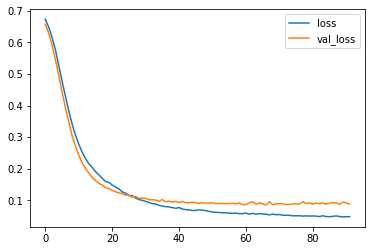

In [60]:
model_loss.plot()

In [62]:
#So the third thing we can do to try to help prevent overfishing is add in dropout layers.
#So dropout layers will essentially turn off a percentage of neurons randomly.

In [64]:
from tensorflow.keras.layers import Dropout
#And what we're going to do is after each of these two dense layers we will add in the drop out calls

In [65]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

#the rate is the probability that you're going to randomly turn off the actual neurons.So it's the fraction of 
#which your randomly turning them off.

#O.5 means 50% of neurons will be turned off. In our case because we haven't specified it that size. 
#Half of those neurons in this layer of 30 are
#going to be turned off.So their weights and biases won't be getting updated.


model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [66]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6722 - val_loss: 0.6405
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6399 - val_loss: 0.6047
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6307 - val_loss: 0.5757
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5984 - val_loss: 0.5516
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5636 - val_loss: 0.5175
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5525 - val_loss: 0.4955
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5281 - val_loss: 0.4697
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5079 - val_loss: 0.4485
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4731 - val_loss: 0.4146
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4514 - val_loss: 0.3818
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1082 - val_loss: 0.1194
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1275 - val_loss: 0.0957
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.1022
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1178 - val_loss: 0.1137
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1169 - val_loss: 0.1071
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1002
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1067 - val_loss: 0.1020
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1196 - val_loss: 0.1057
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1080 - val_loss: 0.0936
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0954 - val_loss: 0.1142
Epoch 93/600


In [67]:
model_loss = pd.DataFrame(model.history.history)

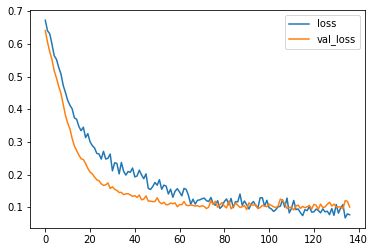

In [68]:
model_loss.plot()

In [69]:
#And this is even better behavior in fact this is absolutely fantastic.Note that the training loss and the 
#validation loss are both quickly going down and they essentially are flattening out at the same rate.

In [70]:
#Now Evaluate
#In keras(classification task) model.predict_classes

In [72]:
predictions = model.predict_classes(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [77]:
print(confusion_matrix(y_test,predictions))
#confusion matrix essentially shows that our network only misclassified 1 point in our test set.

[[54  1]
 [ 4 84]]
